# Principal Component Analysis (PCA)

---

#### Intuition:
* Find features which describe the essentials of your data
* Keep features which maximise variance 
* Ignore features which minimize variance
* Even better, create a new feature which keeps the best bits of multiple features
* Its a bit like OLS, but residuals are perpendicular to the new feature plane, not perpendicular to the original axes 

#### Maths:
* 1: Eigenpairs - mathematically solveable
    * Find a combination of eigenpairs (eigenvectors and eigenvalues)
    * Eigenvalues produce a co-variance matrix with zeros on the diagonal
    * This means the covariance of the two new basis vectors are 0 - ie perpendicular!
    * Eigenvectors can be derived by the eigenvalues and the covariance matrix 
* 2: Maximize variance using gradient descent
    * This can be achieved by minimizing the residuals of the data points to the new feature plane.
    * This neatly maximizes explained variance!
    * See below for intuition behind point 2

![](pca_intuition.gif)

[](pca_intuition.gif)

---

#### Let's start with some familiar code:

In [37]:
from tensorflow.keras.datasets import mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

#### And let's write a function that takes in numpy arrays of images and renders/plots the first 40 of them:

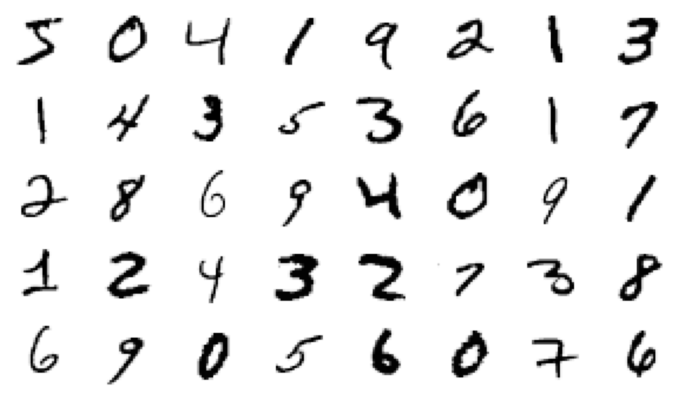

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

def draw_array(x):
    plt.figure(figsize=(12,7))
    for i in range(40):
        plt.subplot(5, 8, i+1)
        plt.imshow(x[i], cmap=plt.cm.Greys)
        plt.axis('off')

draw_array(xtrain)


### 1. Need to reshape the data so that it can be properly handled in sklearn

In [3]:
xtrain[0].shape

(28, 28)

In [4]:
xtrain = xtrain.reshape((60000, 28*28))
xtrain.shape

(60000, 784)

### 2. Split training data even further (to speed up the calculation)

In [5]:
xsmall = xtrain[:1000]
ysmall = ytrain[:1000]

In [6]:
xsmall.shape, ysmall.shape

((1000, 784), (1000,))

### 3. Initialize PCA from Scikit-Learn and fit on X data
- Theres one hyperparameters for PCA - how many features do you want to have left after the dimensionality reduction
- By how many components would we like to decompose our data?
- Caveat: Data MUST BE scaled first!

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
xsmall = scaler.fit_transform(xsmall)

In [40]:
m = PCA(n_components = 100)
m.fit(xsmall)

PCA(n_components=100)

---

- we asked for 40 new features or components
- Notice that each of the components gives us 784 coefficients:

In [41]:
m.components_.shape 

(100, 784)

In [56]:
m.components_[0]

array([-5.98416969e-17,  2.72956306e-17,  8.47904906e-18, -2.64809991e-18,
        3.53661847e-18,  1.68890193e-19, -1.59304551e-19, -2.06518323e-19,
       -3.96715366e-19,  1.65425970e-19, -4.50229502e-20,  1.77698511e-20,
        2.23031985e-20,  2.56273189e-21, -2.38483422e-20,  2.69633979e-20,
        5.60955626e-21,  7.25936635e-21,  2.87748973e-21,  1.89653512e-21,
       -5.38322001e-22, -1.57254387e-21, -2.37286810e-21,  1.20954407e-21,
       -2.15865891e-21, -9.85982885e-22, -3.86608575e-22,  3.13406875e-22,
        4.95103492e-22,  4.83629420e-22,  4.25420376e-22,  7.63696107e-22,
        1.35089237e-23,  1.39830628e-22, -4.10542720e-22,  1.06373456e-22,
        3.97057049e-22,  2.73711029e-22, -5.88634789e-04, -5.88634789e-04,
       -2.17383094e-22,  9.97354840e-03,  8.30061931e-03,  6.68694897e-03,
        1.05601370e-02,  1.10910387e-02,  9.79796032e-03, -1.37376261e-22,
        1.27952130e-23, -4.64237594e-23, -2.29610098e-23,  9.81821834e-23,
       -8.19530912e-23, -

---

- And we can see the percentage of the over variation in the data that each principal contributes.

In [43]:
m.explained_variance_ratio_.sum()

0.8472838926241884

### 4. Use the trained PCA model to transform the data to a lower number of features.

In [46]:
xtrain = xtrain.reshape(-1,784)

In [47]:
xt = m.transform(xtrain) #transform the training data
xt.shape #transformed to 40 features instead of the original 784

(60000, 100)

---

### 5. Use the inverse_transform() method to expand our reduced data back into its original shape.

In [48]:
xback = m.inverse_transform(xt)
print(xback.shape)
xback = xback.reshape((60000, 28, 28))

(60000, 784)


### 6. Visualize what our data looks after it has been reduced to N features.

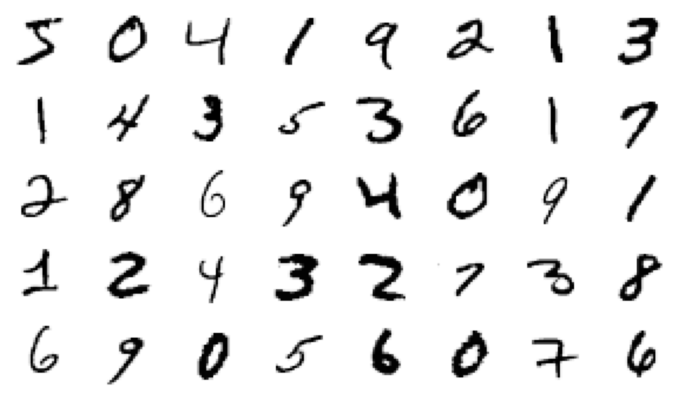

In [38]:
draw_array(xtrain)

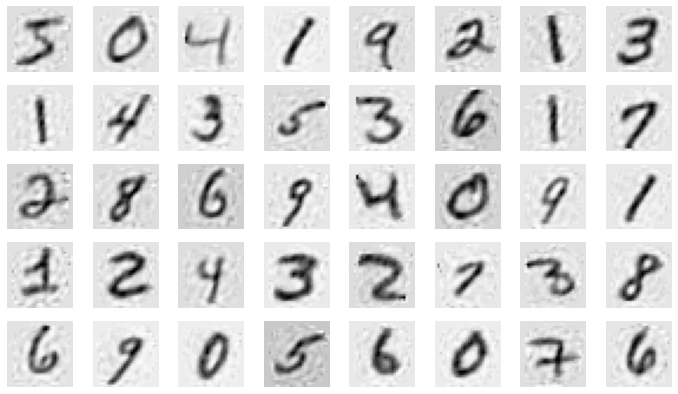

In [49]:
draw_array(xback)

---

### 7. Can we actually see what the components look like, as well?

In [50]:
m.components_.shape

(100, 784)

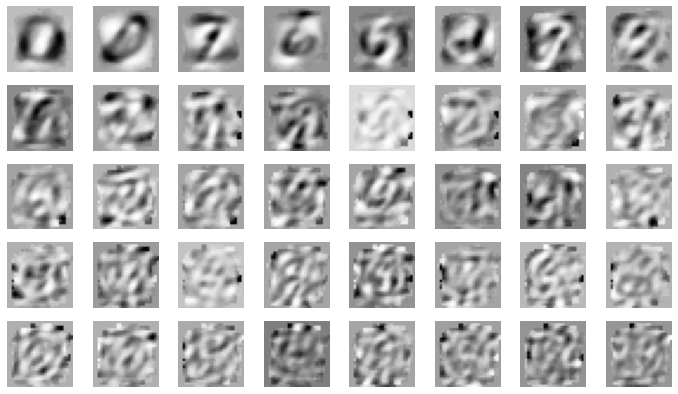

In [52]:
comps = m.components_.reshape((100, 28, 28)) #convert back to original format
draw_array(comps)

---

### Other interesting analysis:
- We can see how much of an impact adding more components has on capturing the overall variance of the original data set.
- We can do this by transforming the data with another PCA model that captures the maximum number of components (which in our case is 784) and plotting the cumulative sum of the explained variance ratio.

In [53]:
m784 = PCA() 
#note that the default number of components is the original number of features, so we don't need to specify it explicitly
xt784 = m784.fit_transform(xsmall)

In [54]:
m.explained_variance_ratio_

array([0.06494624, 0.05482451, 0.04566391, 0.03486269, 0.03193317,
       0.02691876, 0.02403876, 0.02224378, 0.01966827, 0.01876841,
       0.01641957, 0.01600129, 0.01446706, 0.01422404, 0.01383964,
       0.01315772, 0.01272583, 0.01226067, 0.01145435, 0.01115627,
       0.0105778 , 0.0103366 , 0.00990048, 0.00962084, 0.00937196,
       0.00879511, 0.00849959, 0.00818189, 0.0078906 , 0.00779832,
       0.00750031, 0.00727801, 0.00719981, 0.00704664, 0.006758  ,
       0.00667095, 0.00646426, 0.00630298, 0.00623506, 0.00593139,
       0.0057297 , 0.00559277, 0.00539843, 0.00535413, 0.00531185,
       0.00525429, 0.00511268, 0.00502947, 0.00497518, 0.0047968 ,
       0.0046811 , 0.00466008, 0.00453932, 0.00453537, 0.00439398,
       0.00428117, 0.00411547, 0.00408244, 0.0039765 , 0.00393297,
       0.00387836, 0.00378321, 0.00366589, 0.00366033, 0.00362579,
       0.00350248, 0.00346556, 0.00341275, 0.00337148, 0.00330397,
       0.00327381, 0.00321823, 0.00317643, 0.00308498, 0.00304

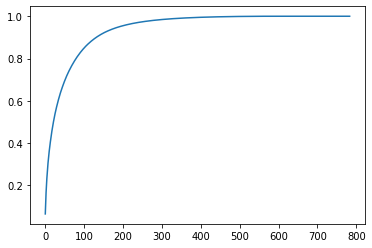

In [55]:
import numpy as np
ex_var = m784.explained_variance_ratio_
cumsum = np.array(ex_var).cumsum()
x=range(784)
plt.plot(x, cumsum)

# WHY DO THIS?
* Preprocessing for ML 
    - to help with the curse of dimensionality, 
    - To upsample data - like we did above
* Reasoning about high-dimensional data - e.g. tenosorflow word embedding cloud

## Why do we care about THIS WEEK!
* NMF AND PCA are close cousins in the SVD family of algorithms
* you could try switching between the two
* (T-sne is another option for dimensionality reduction)

---

### Further info:
* [General intro](https://www.youtube.com/watch?v=FgakZw6K1QQ)
* [Low level on eigenpairs](https://www.youtube.com/watch?v=2fCBE7DWgd0)
* [3 blue 1 brown](https://www.youtube.com/watch?v=PFDu9oVAE-g)